In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [1]:
!unzip mask.zip
!unzip neutral.zip


Archive:  mask.zip
  inflating: mask/1.jpg              
  inflating: mask/10.jpg             
  inflating: mask/11.jpg             
  inflating: mask/12.jpg             
  inflating: mask/13.jpg             
  inflating: mask/14.jpg             
  inflating: mask/15.jpg             
  inflating: mask/16.jpg             
  inflating: mask/17.jpg             
  inflating: mask/18.jpg             
  inflating: mask/19.jpg             
  inflating: mask/2.jpg              
  inflating: mask/20.jpg             
  inflating: mask/21.jpg             
  inflating: mask/22.jpg             
  inflating: mask/23.jpg             
  inflating: mask/24.jpg             
  inflating: mask/25.jpg             
  inflating: mask/26.jpg             
  inflating: mask/27.jpg             
  inflating: mask/28.jpg             
  inflating: mask/29.jpg             
  inflating: mask/3.jpg              
  inflating: mask/30.jpg             
  inflating: mask/31.jpg             
  inflating: mask/32.jpg       

In [59]:
!unzip happy.zip


Archive:  happy.zip
replace happy/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: happy/1.jpg             
  inflating: happy/10.jpg            
  inflating: happy/12.jpg            
  inflating: happy/13.jpg            
  inflating: happy/14.jpg            
  inflating: happy/15.jpg            
  inflating: happy/16.jpg            
  inflating: happy/17.jpg            
  inflating: happy/18.jpg            
  inflating: happy/19.jpg            
  inflating: happy/2.jpg             
  inflating: happy/20.jpg            
  inflating: happy/21.jpg            
  inflating: happy/22.jpg            
  inflating: happy/23.jpg            
  inflating: happy/24.jpg            
  inflating: happy/25.jpg            
  inflating: happy/26.jpg            
  inflating: happy/27.jpg            
  inflating: happy/28.jpg            
  inflating: happy/29.jpg            
  inflating: happy/3.jpg             
  inflating: happy/30.jpg            
  inflating: happy/31.jpg            
  infla

In [61]:
!unzip sad.zip

Archive:  sad.zip
  inflating: sad/1.jpg               
  inflating: sad/10.jpg              
  inflating: sad/11.jpg              
  inflating: sad/12.jpg              
  inflating: sad/13.jpg              
  inflating: sad/14.jpg              
  inflating: sad/15.jpg              
  inflating: sad/16.jpg              
  inflating: sad/17.jpg              
  inflating: sad/18.jpg              
  inflating: sad/19.jpg              
  inflating: sad/2.jpg               
  inflating: sad/20.jpeg             
  inflating: sad/21.jpg              
  inflating: sad/22.jpg              
  inflating: sad/23.jpg              
  inflating: sad/24.jpg              
  inflating: sad/25.jpg              
  inflating: sad/26.jpg              
  inflating: sad/27.jpg              
  inflating: sad/28.jpg              
  inflating: sad/29.jpg              
  inflating: sad/3.jpg               
  inflating: sad/30.jpg              
  inflating: sad/31.jpg              
  inflating: sad/32.jpg         

In [9]:
!unzip surprise.zip

Archive:  surprise.zip
  inflating: surprise/1.jpg          
  inflating: surprise/10.jpg         
  inflating: surprise/11.jpg         
  inflating: surprise/12.jpg         
  inflating: surprise/13.jpg         
  inflating: surprise/14.jpg         
  inflating: surprise/15.jpg         
  inflating: surprise/16.jpg         
  inflating: surprise/17.jpeg        
  inflating: surprise/18.jpg         
  inflating: surprise/19.jpg         
  inflating: surprise/2.jpg          
  inflating: surprise/20.jpg         
  inflating: surprise/21.jpg         
  inflating: surprise/22.jpg         
  inflating: surprise/23.jpg         
  inflating: surprise/24.jpg         
  inflating: surprise/25.jpg         
  inflating: surprise/26.jpg         
  inflating: surprise/27.jpg         
  inflating: surprise/28.jpg         
  inflating: surprise/29.jpg         
  inflating: surprise/3.jpg          
  inflating: surprise/30.jpg         
  inflating: surprise/31.jpg         
  inflating: surprise/33.jp

In [34]:
!unzip angry.zip

Archive:  angry.zip
  inflating: angry/1.jpg             
  inflating: angry/10.jpg            
  inflating: angry/11.jpg            
  inflating: angry/12.jpg            
  inflating: angry/13.jpg            
  inflating: angry/14.jpg            
  inflating: angry/15.jpg            
  inflating: angry/16.jpg            
  inflating: angry/17.jpg            
  inflating: angry/18.jpg            
  inflating: angry/19.jpg            
  inflating: angry/2.jpg             
  inflating: angry/20.jpg            
  inflating: angry/21.jpg            
  inflating: angry/22.jpg            
  inflating: angry/23.jpg            
  inflating: angry/24.jpg            
  inflating: angry/25.jpg            
  inflating: angry/26.jpg            
  inflating: angry/27.jpg            
  inflating: angry/28.jpg            
  inflating: angry/29.jpg            
  inflating: angry/3.jpg             
  inflating: angry/30.jpg            
  inflating: angry/31.jpg            
  inflating: angry/32.jpg     

In [3]:
import os
import cv2

In [63]:
x = [] #categories
y = []  #number
mask_folder = 'mask'
neutral_folder = 'neutral'
surprise_folder = 'surprise'
angry_folder = 'angry'
happy_folder = 'happy'
sad_folder = 'sad'
name_decode = {"mask": 0 , "neutral":1 , "surprise" : 2 , "angry" : 3 , "happy" : 4 , "sad" : 5}
def img_to_array(folder  , name):
  for image in os.listdir(folder):
    image1 = Image.open(os.path.join(folder,image))
    resize_img = Image.Image.resize(image1 ,[100,100])
    array_img = np.array(resize_img)
    x.append(array_img)
    y.append(name_decode[name])

    flip = cv2.flip(array_img , 1)
    x.append(flip)
    y.append(name_decode[name])

    blur = cv2.blur(array_img,(2,2))
    x.append(blur)
    y.append(name_decode[name])
  
def show_img(index):
  plt.imshow(x[index])
  plt.show()
  print(y[index])

img_to_array(mask_folder , 'mask')
img_to_array(neutral_folder , 'neutral')
img_to_array(surprise_folder , 'surprise')
img_to_array(angry_folder , 'angry')
img_to_array(happy_folder , 'happy')
img_to_array(sad_folder , 'sad')

y = to_categorical(y , num_classes=6)
x = (np.array(x) - 127.5)/127.5




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


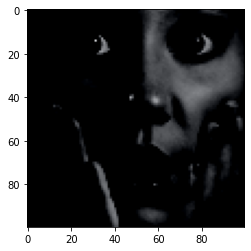

[0. 0. 1. 0.]


In [39]:
show_img(300)

In [75]:
from keras.models import Sequential
from keras.layers import Dense , Conv2D , MaxPool2D , Flatten , Dropout , Activation , BatchNormalization 
model = Sequential()
model.add(Conv2D(32 , (5,5), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))

In [76]:
model.add(Conv2D(100 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(100 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(264 , (3,3), padding='same' ,input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))



In [77]:
from keras.optimizers import Adam

In [78]:
optimizer = Adam(learning_rate=0.001)
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1. 0. 0. 0. 0.]


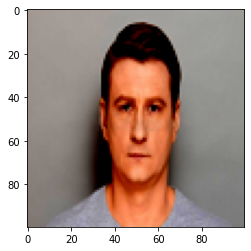

[0. 1. 0. 0. 0. 0.]


In [72]:
print(y[280])
show_img(280)

In [80]:
model.compile(optimizer=optimizer  , loss ='categorical_crossentropy' , metrics=['accuracy'])
# from keras.callbacks import EarlyStopping
# earlyStop = EarlyStopping(monitor ='val_accuracy' , patience = 10 , mode='max')
model.fit(x_train , y_train , batch_size=13 , epochs=2000 , validation_data=(x_test , y_test))

Epoch 1/2000
62/62 [==============================] - 3s 21ms/step - loss: 2.1181 - accuracy: 0.1956 - val_loss: 1.7985 - val_accuracy: 0.1910
Epoch 2/2000
62/62 [==============================] - 1s 10ms/step - loss: 1.8894 - accuracy: 0.2129 - val_loss: 1.6564 - val_accuracy: 0.2697
Epoch 3/2000
62/62 [==============================] - 1s 9ms/step - loss: 1.8133 - accuracy: 0.2997 - val_loss: 1.7601 - val_accuracy: 0.2697
Epoch 4/2000
62/62 [==============================] - 1s 10ms/step - loss: 1.7548 - accuracy: 0.2725 - val_loss: 1.8165 - val_accuracy: 0.2921
Epoch 5/2000
62/62 [==============================] - 1s 10ms/step - loss: 1.6014 - accuracy: 0.3316 - val_loss: 2.0097 - val_accuracy: 0.2472
Epoch 6/2000
62/62 [==============================] - 1s 10ms/step - loss: 1.6158 - accuracy: 0.3568 - val_loss: 2.0988 - val_accuracy: 0.2809
Epoch 7/2000
62/62 [==============================] - 1s 10ms/step - loss: 1.6208 - accuracy: 0.4013 - val_loss: 1.6156 - val_accuracy: 0.3708


In [81]:
model.save('cnn_class6_new.h5')

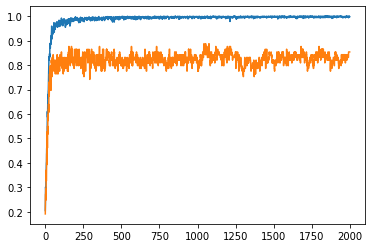

In [82]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [ ]:
model.predict_classes(x_test)

In [ ]:
# def prediction(index):
#   array = (np.array(x[index])-127.5)/127.5
#   array = array.reshape(1,100,100,3)
#   prediction = model.predict_classes(array)
#   print(prediction[0])
#   plt.imshow(x[index])
#   plt.show()
  

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


neutral


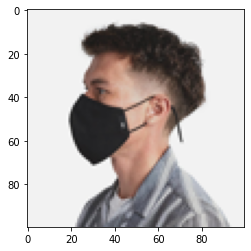

In [57]:
from keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# model = load_model('cnn_class3_new.h5')


img = Image.open('3.jpg')
plt.imshow(img)
img1 =Image.Image.resize(img,[100,100])
img2 = (np.array(img1)-127.5)/127.5
filtered_img = img2.reshape(1,100,100,3)
predict = model.predict_classes(filtered_img )
if predict == 0:
  print('mask')

  plt.imshow(img1)
elif predict == 2:
  print('surprise')
  plt.imshow(img1)
elif predict == 3:
  print('angry')
  plt.imshow(img1)
else:
  print('neutral')
  plt.imshow(img1)


